# Data cleansing on noisy handwriting digits data

In this demo we used scikit learn Recognizing hand-written digits example.

## Loading data
First we load the hand writing digits from scikit learn dataset

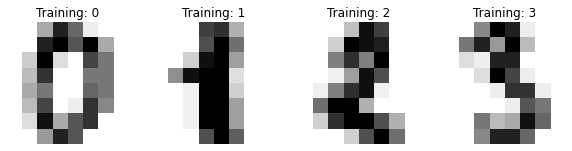

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

digits = datasets.load_digits()
true_y = np.copy(digits.target)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, true_y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification on original data
We apply a SVM classifier on flatten images data. To do that we split data into two section train and test and evaluate the perfomance of the classifier on test data.

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Text(0.5, 0.98, 'Confusion Matrix')

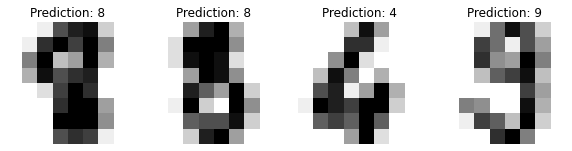

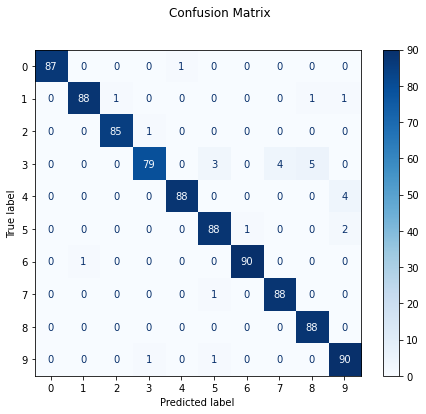

In [2]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, true_y, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)



_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
    
#### classification report
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)    

#### plot a confusion matrix 
fig, ax = plt.subplots(figsize=(8,6))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, 
                                                       predicted,
                                                       cmap=plt.cm.Blues,
                                                       ax=ax)
fig.suptitle("Confusion Matrix")


We can see the accuracy of the classification model is 0.97.

## Add label noise
Now we add label noise to the data by keeping a copy of true (grand truth) labels and shuffling the lables of some random images. We define the `noise_ration` as the proportion of the dataset to have noisy labels. After shuffling we can notice that some images might obtain their original labels. So, we calculate the actual noise ratio as the total images that actually have different labels as their original true label. 

We also can plot some of those images with label noise.

label noise ratio: 			 0.5 (898 samples)
actual lable noise ratio (shuffled): 0.4491 (807 actual samples)


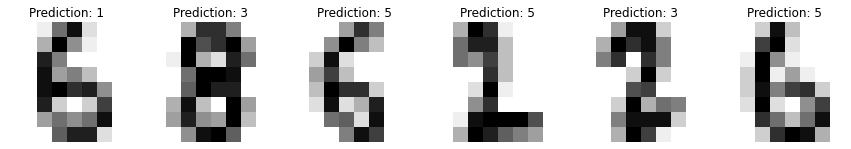

In [3]:
noisy_y = np.copy(digits.target)
noise_ratio = 0.5
num_noise = np.floor(digits.target.shape[0] * noise_ratio).astype(int)

noisy_index = np.random.choice(true_y.shape[0], num_noise, replace=False)  # index of noisy label
noisy_y[noisy_index] =  shuffle(noisy_y[noisy_index], random_state=0)

num_noise_actual = (num_noise - (noisy_y[noisy_index] == true_y[noisy_index]).sum()) 
actual_noisy_index = noisy_index[noisy_y[noisy_index] != true_y[noisy_index]]
noise_ratio_actual = num_noise_actual/true_y.shape[0]
print(f"label noise ratio: \t\t\t {noise_ratio} ({num_noise} samples)\n" +
      f"actual lable noise ratio (shuffled): {noise_ratio_actual:.4f} ({num_noise_actual} actual samples)")

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3))
for ax, image, prediction in zip(axes, digits.images[actual_noisy_index], noisy_y[actual_noisy_index]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
    


We can see by suffling 0.5 of random images on the dataset, we added label nosie to about 0.45 of data. The total number of samples which have been affected by shuffling and got other labels than their original labels are around 800 images. 

## classification of noisy data

We trained same model with noise data similary and by applying same models on the data, we can see the perfomance of the classificaion model drops from 0.97 to around 0.50

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.62      0.59      0.61        91
           1       0.55      0.58      0.57        90
           2       0.58      0.47      0.52        96
           3       0.47      0.43      0.45        92
           4       0.58      0.51      0.54       100
           5       0.47      0.47      0.47        89
           6       0.51      0.56      0.53        84
           7       0.41      0.47      0.44        86
           8       0.47      0.47      0.47        85
           9       0.43      0.52      0.47        86

    accuracy                           0.51       899
   macro avg       0.51      0.51      0.51       899
weighted avg       0.51      0.51      0.51       899




Text(0.5, 0.98, 'Confusion Matrix (Noisy Vs Predicted)')

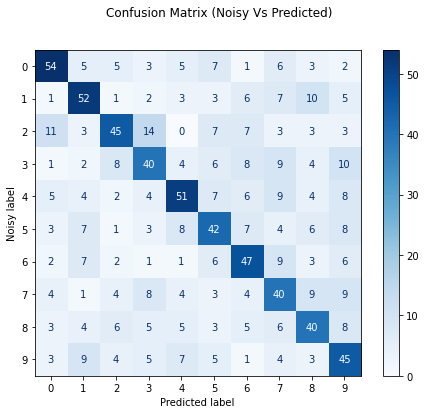

In [4]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, noisy_y, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

    
#### classification report
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)    

#### plot a confusion matrix 
fig, ax = plt.subplots(figsize=(8,6))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, 
                                                       predicted,
                                                       cmap=plt.cm.Blues,
                                                       ax=ax)
ax.set_ylabel("Noisy label")
fig.suptitle("Confusion Matrix (Noisy Vs Predicted)")


## Data cleansing
One approach to handle noise label is data cleansing method. We can import and create instance of the LabelNoise class and apply the data cleansing method on the noisy data to remove and reassign label noise. It will identify label noise base on running classification mutliple time iteratibly on the noisy data in cross-validated form and reasign new labels to them based on the cleansed data. The method continues till the noise_ratio of the dataset drops below some threshold (default is 0.05). The method described in more detail in our paper [1]. 

Caveate: the choise of classifier and its parameters is important. One way to obtain good classification pipeline is to apply grid search on multiple models with different range of parameters.

To do that we need to define a scikit learn classification pipeline and assign it to the `LabelNoise` instance. 

The `LabelNoise` class can take:
```
data: input data
targe: the given labels
name: name for instance.
pipeline: classification pipeline
cv: cross validation form
balance_method: the method to handel imbalanced classes. undersampling, oversampling and None.
noise_threshold: onise ratio threshold to stop convergance of data cleansing algorithm.

```

<a href="https://doi.org/10.1016/j.bpsc.2020.05.008">[1]  Rokham, Hooman, et al. "Addressing inaccurate nosology in mental health: A multilabel data cleansing approach for detecting label noise from structural magnetic resonance imaging data in mood and psychosis disorders." Biological Psychiatry: Cognitive Neuroscience and Neuroimaging 5.8 (2020): 819-832.</a> https://doi.org/10.1016/j.bpsc.2020.05.008

In [5]:
from labelnoise import LabelNoise
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline

#### pipelines
svm_params = dict(gamma=0.001)

pipeline = Pipeline([
    ("clf", svm.SVC(**svm_params))
    ])

#### Cross validation
cv = RepeatedStratifiedKFold(n_splits=5, 
                             n_repeats=3,
                             random_state=None)

#### label noise instance
ln_digits = LabelNoise(
                data=data,
                target=noisy_y, 
                name="noisy_digit_svm",
                verbose=1,
                pipeline = pipeline,
                cv=cv,
                balance_method = "undersampling",
                noise_threshold = 0.05
            )



After creating instance we can call `datacleansing` function of instance. It returns the `given_labels` and `cleansed_labels` for the dataset.

In [6]:
#### apply data cleansing 
ln_digits.datacleansing()

/n/n/n############## converge_iter:1 ##############
undersampling applied on data
model score: 0.511
model score: 0.546
model score: 0.486
model score: 0.612
model score: 0.520
model score: 0.517
model score: 0.520
model score: 0.523
model score: 0.552
model score: 0.563
model score: 0.503
model score: 0.549
model score: 0.523
model score: 0.555
model score: 0.532
model score: 0.555
model score: 0.583
model score: 0.503
model score: 0.523
model score: 0.523
model score: 0.523
model score: 0.511
model score: 0.509
model score: 0.549
model score: 0.569
model score: 0.575
model score: 0.540
model score: 0.537
model score: 0.532
model score: 0.494
current noise rate: 0.4608
/n/n/n############## converge_iter:2 ##############
undersampling applied on data
model score: 0.989
model score: 0.994
model score: 0.989
model score: 0.986
model score: 0.994
model score: 0.991
model score: 0.989
model score: 0.997
model score: 0.989
model score: 0.994
model score: 0.991
model score: 0.994
model score

4       4
5       9
9       9
13      3
14      4
       ..
1784    5
1789    8
1790    8
1791    4
1796    8
Name: cleansed_target, Length: 828, dtype: int32

We can see that after the noise ratio in second convergance iteration drops from ~0.45 to ~0.006. Given labels and newly assigned cleansed labels return as the output of the datacleansing method.

We can copare the cleansed labels from `datacleansing` to the ground truth labels. Note the ground truth labels are the original labels of the digit dataset before applying label noise. 

Text(0.5, 0, 'Cleansed label')

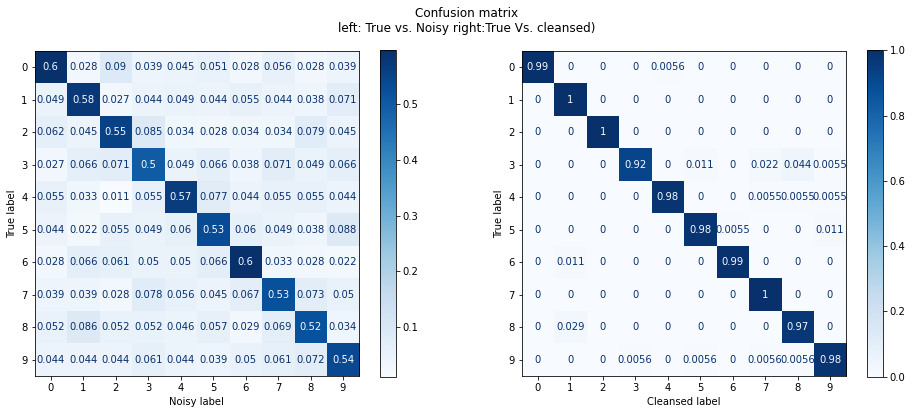

In [7]:
ln_digits.labels['true_y'] = true_y

#### plot a confusion matrix 
fig, ax = plt.subplots(1,2, figsize=(8*2,6))
fig.suptitle("Confusion matrix\nleft: True vs. Noisy right:True Vs. cleansed)")
metrics.ConfusionMatrixDisplay.from_predictions(ln_digits.labels['true_y'], 
                                                       ln_digits.labels['given_target'],
                                                       cmap=plt.cm.Blues,
                                                       normalize="true",
                                                       ax=ax[0])

metrics.ConfusionMatrixDisplay.from_predictions(ln_digits.labels['true_y'], 
                                                       ln_digits.labels['cleansed_target'],
                                                       cmap=plt.cm.Blues,
                                                       normalize="true",
                                                       ax=ax[1])
ax[0].set_xlabel("Noisy label")
ax[1].set_xlabel("Cleansed label")

